── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.2     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Classes and Methods for R developed in the
Polit

,X,id,time,status,age,sex,disease,frail
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,1,1,8,1,28,1,Other,2.3
2,2,1,16,1,28,1,Other,2.3
3,3,2,23,1,48,2,GN,1.9
4,4,2,13,0,48,2,GN,1.9
5,5,3,22,1,32,1,Other,1.2
6,6,3,28,1,32,1,Other,1.2


       X               id            time           status            age      
 Min.   : 1.00   Min.   : 1.0   Min.   :  2.0   Min.   :0.0000   Min.   :10.0  
 1st Qu.:19.75   1st Qu.:10.0   1st Qu.: 16.0   1st Qu.:1.0000   1st Qu.:34.0  
 Median :38.50   Median :19.5   Median : 39.5   Median :1.0000   Median :45.5  
 Mean   :38.50   Mean   :19.5   Mean   :101.6   Mean   :0.7632   Mean   :43.7  
 3rd Qu.:57.25   3rd Qu.:29.0   3rd Qu.:149.8   3rd Qu.:1.0000   3rd Qu.:54.0  
 Max.   :76.00   Max.   :38.0   Max.   :562.0   Max.   :1.0000   Max.   :69.0  
      sex          disease              frail      
 Min.   :1.000   Length:76          Min.   :0.200  
 1st Qu.:1.000   Class :character   1st Qu.:0.600  
 Median :2.000   Mode  :character   Median :1.100  
 Mean   :1.737                      Mean   :1.184  
 3rd Qu.:2.000                      3rd Qu.:1.500  
 Max.   :2.000                      Max.   :3.000  

[1] 76  8

'data.frame':	76 obs. of  8 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ id     : int  1 1 2 2 3 3 4 4 5 5 ...
 $ time   : int  8 16 23 13 22 28 447 318 30 12 ...
 $ status : int  1 1 1 0 1 1 1 1 1 1 ...
 $ age    : int  28 28 48 48 32 32 31 32 10 10 ...
 $ sex    : int  1 1 2 2 1 1 2 2 1 1 ...
 $ disease: chr  "Other" "Other" "GN" "GN" ...
 $ frail  : num  2.3 2.3 1.9 1.9 1.2 1.2 0.5 0.5 1.5 1.5 ...



 0  1 
18 58 

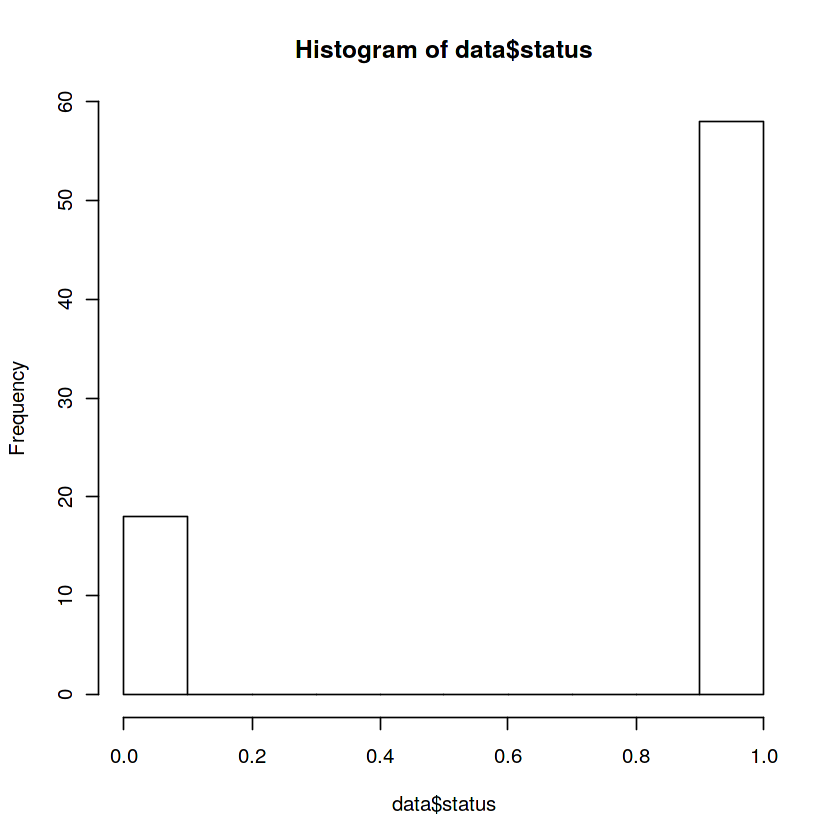

In [1]:
##Load Libraries

library(ggplot2)
library(tidyverse)
library(dplyr)
library(readr)
library(cowplot)

library(olsrr)
library(caret)
library(pscl)
library(lmtest)
library(ipred)
library(survival)
library(ResourceSelection)
library(survey)
library(lmtest)
library(pROC)
library(DescTools)

## NOTE: This is a proof of concept. Further validation work needs to take place.
##need to create train/datasets

data = read.csv('../input/kidney-catheter-data/kidney.csv', stringsAsFactors = F)
head(data) #allows you to check the data, first few entries 
summary(data) #produce result summaries of the results of various model fitting functions.
dim(data) #the dimension (e.g. the number of columns and rows) of a matrix, array or data frame. 
str(data) 
# this shows that we need to tell R which columns contain factors
# it will also show us if there are some missing values.
hist(data$status)

#Baseline Accuracy
table(data$status)

,X,id,time,status,age,sex,disease,frail
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,1,1,8,1,28,1,Other,2.3
2,2,1,16,1,28,1,Other,2.3
3,3,2,23,1,48,2,GN,1.9
7,7,4,447,1,31,2,Other,0.5
8,8,4,318,1,32,2,Other,0.5
10,10,5,12,1,10,1,Other,1.5


,X,id,time,status,age,sex,disease,frail
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
4,4,2,13,0,48,2,GN,1.9
5,5,3,22,1,32,1,Other,1.2
6,6,3,28,1,32,1,Other,1.2
9,9,5,30,1,10,1,Other,1.5
12,12,6,245,1,17,2,Other,1.1
17,17,9,53,1,69,2,AN,0.7


[1] 60

[1] 16

[1] 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0
[39] 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0


Call:
glm(formula = formula, family = binomial, data = datatrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0827   0.1904   0.5941   0.7677   1.1013  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  2.38933    2.10619   1.134   0.2566  
age         -0.01520    0.02352  -0.646   0.5181  
sex         -0.94032    0.86803  -1.083   0.2787  
frail        1.10919    0.60947   1.820   0.0688 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.193  on 59  degrees of freedom
Residual deviance: 59.260  on 56  degrees of freedom
AIC: 67.26

Number of Fisher Scoring iterations: 5


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5453  0.6563  0.7920  0.7667  0.8562  0.9820 

1         2         3         7         8        10        11        13 
0.9727346 0.9727346 0.8683525 0.6438319 0.6403384 0.9507702 0.8154123 0.9820365 
       14        15        16        18        19        20        23        24 
0.9820365 0.5565565 0.5528015 0.5587804 0.7535071 0.7506728 0.7896572 0.7896572 
       25        27        28        29        30        31        32        33 
0.8219326 0.5778367 0.5778367 0.6668423 0.6668423 0.8528363 0.8528363 0.6186793 
       34        35        36        38        42        43        45        46 
0.6186793 0.6775144 0.6741841 0.5640465 0.7223952 0.6722006 0.8102770 0.8079290 
       47        48        49        50        51        52        53        54 
0.7269913 0.7239638 0.8280362 0.8280362 0.5490406 0.5452740 0.8287478 0.8287478 
       55        56        57        58        59        60        61        63 
0.8474507 0.8474507 0.9094639 0.9094639 0.7943888 0.7943888 0.8239033 0.7668403 
       64        65        67        68        69        70        71        72 
0.7641113 0.9457739 0.6493657 0.6458966 0.9317867 0.9317867 0.6562563 0.6562563 
       73        74        75        76 
0.8856948 0.8856948 0.8662198 0.8662198

0         1 
0.6985160 0.7874082

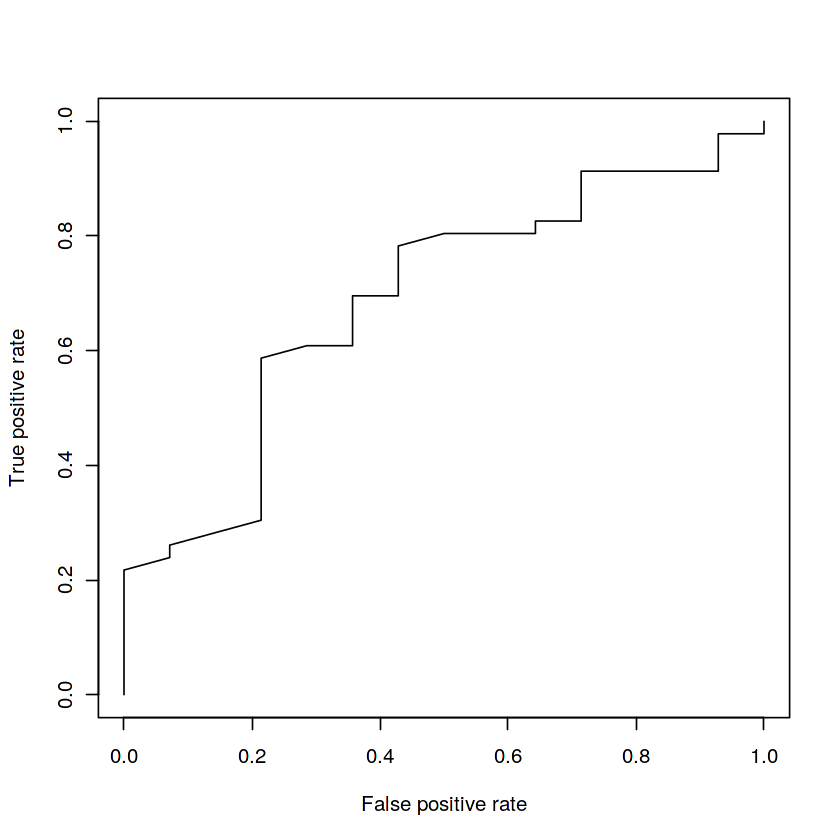

   
y   FALSE TRUE
  0    11    3
  1    21   25

   
z   FALSE TRUE
  0     3    1
  1     5    7

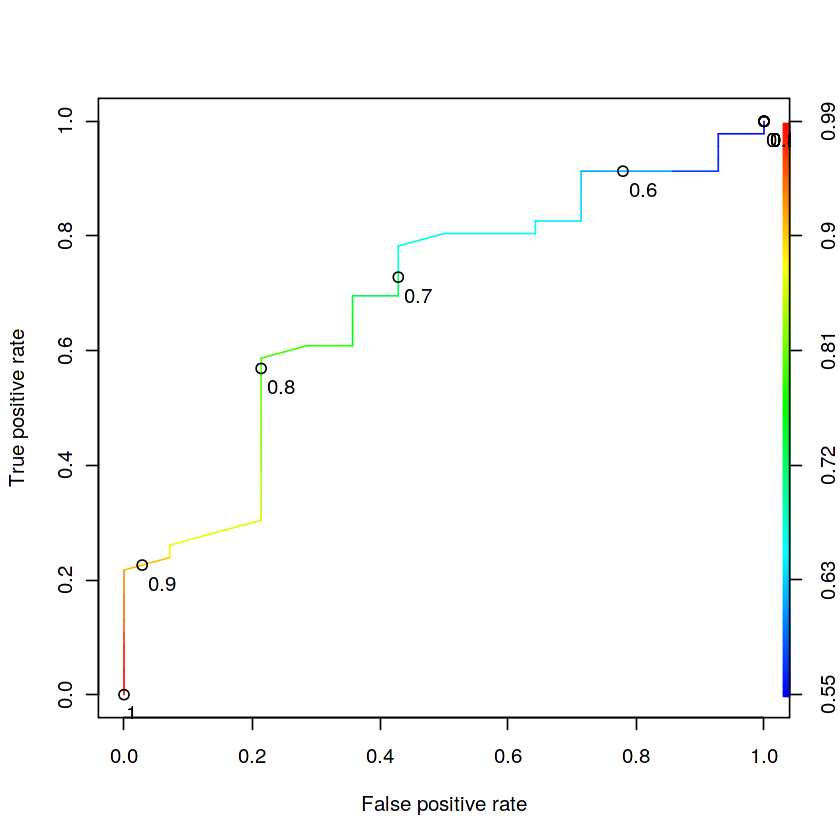

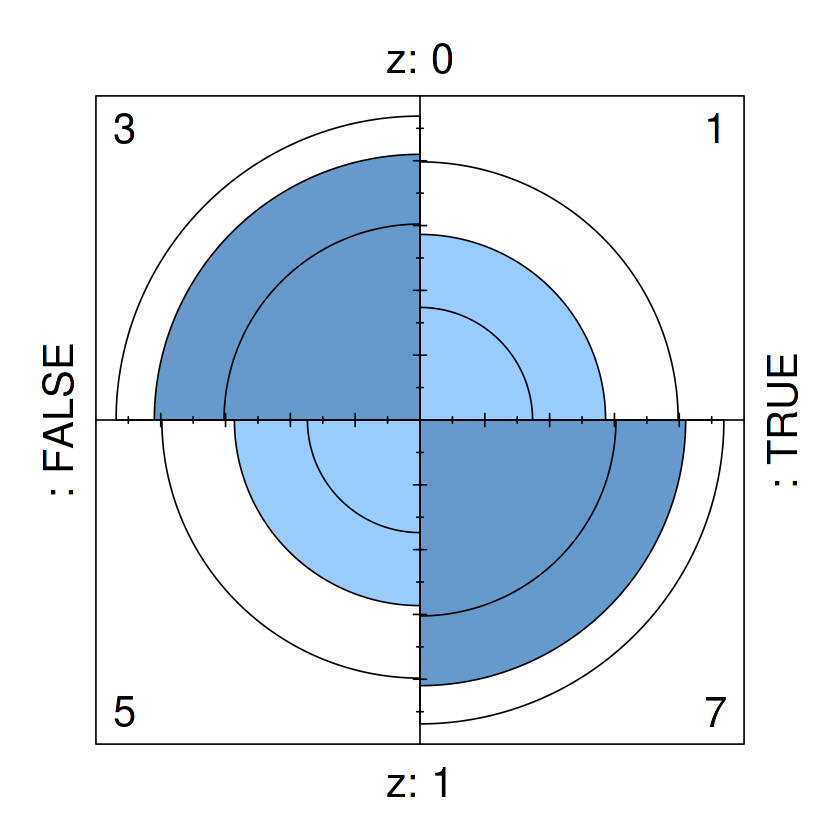

[1] 0.625

FALSE  TRUE 
0.375 0.875

0         1 
0.7500000 0.5833333

FALSE  TRUE 
  0.5   0.7

[1] 0.6886646

[1] 0.65625

Setting levels: control = 0, case = 1

Setting direction: controls < cases



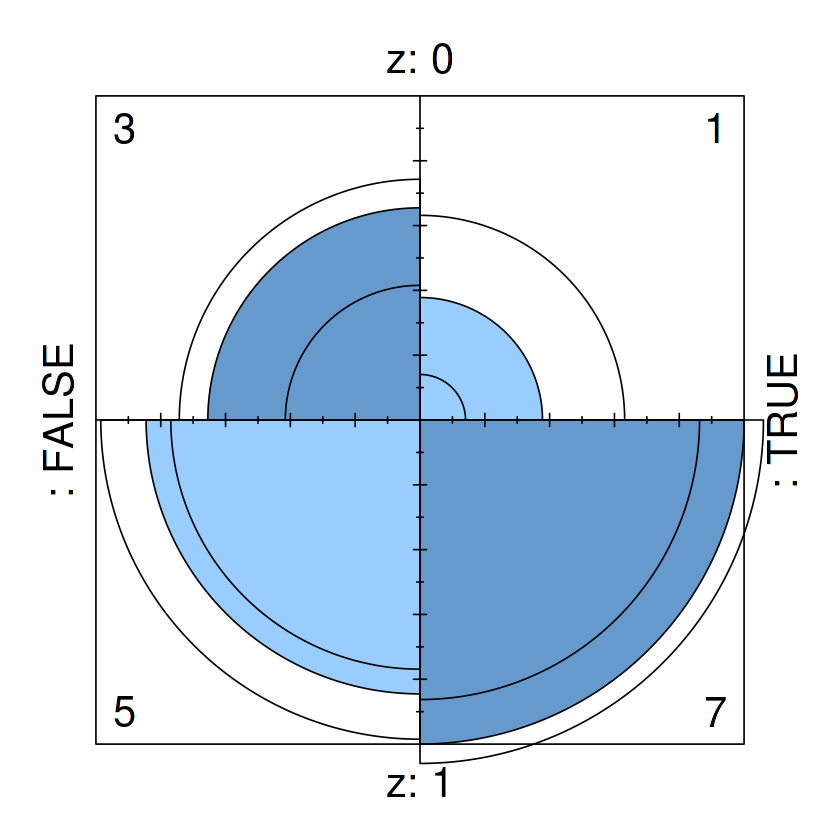

Efron 
0.08684389

McFadden 
0.09100669

CoxSnell 
0.09415123

Nagelkerke 
 0.1420893

Tjur 
0.08889214

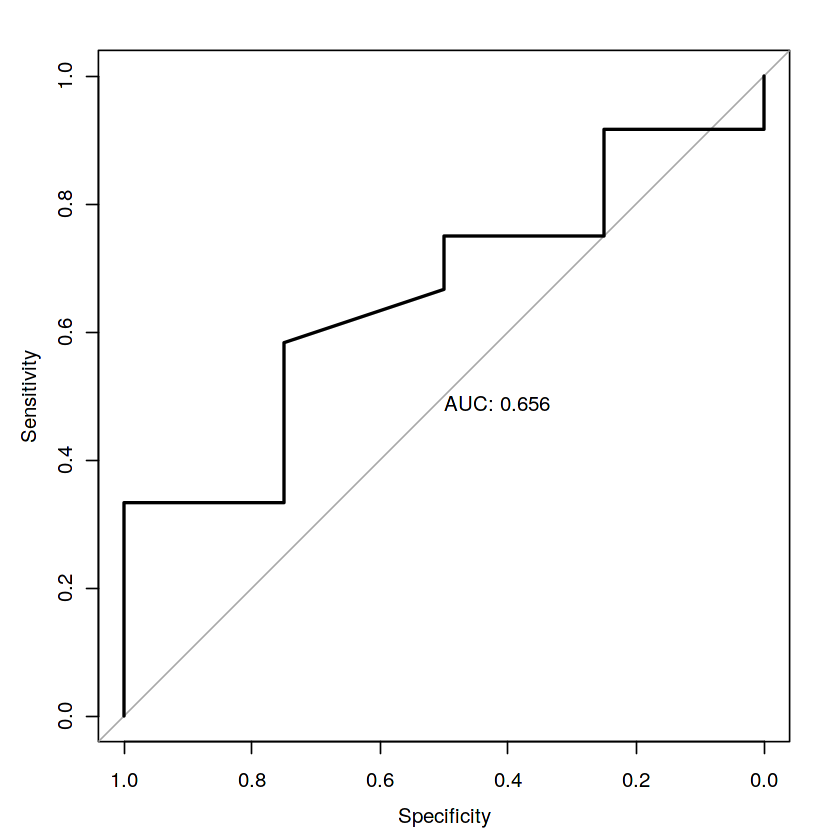

age      sex    frail 
1.001659 1.012360 1.013818

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:DescTools’:

    Recode


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
age,1,0.3247289,0.56877948
sex,1,2.2269627,0.13562022
frail,1,3.1373753,0.07651685


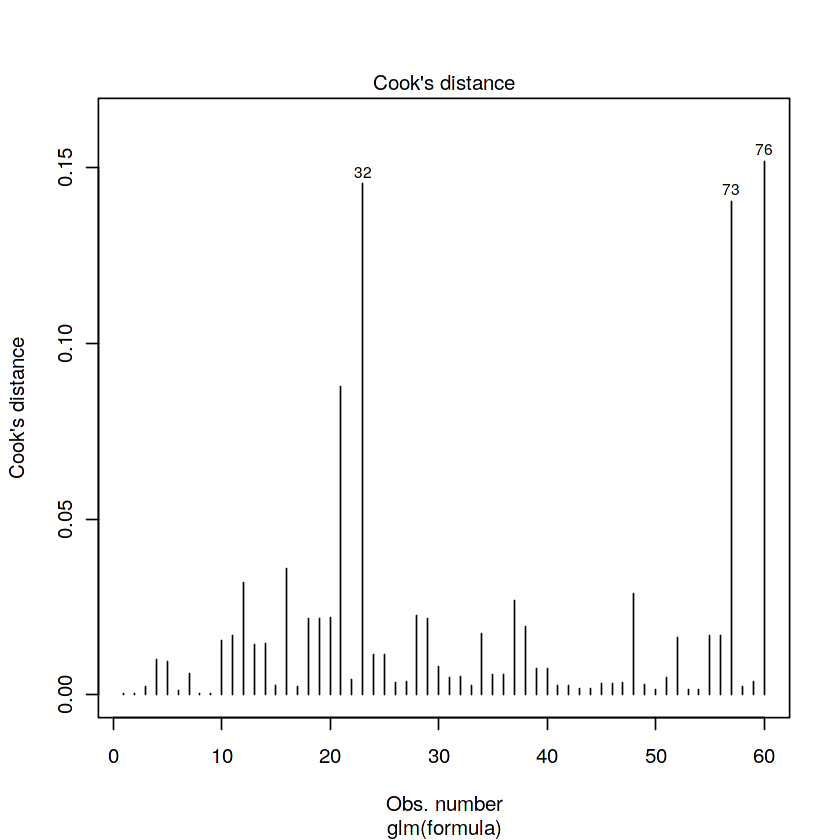

In [2]:
#CATOOLS
library(caTools)
x=data$status
set.seed(123)
split = sample.split(x, SplitRatio = 0.80) 

datatrain = subset(data, split==TRUE)
datatest = subset(data, split==FALSE)

head(datatrain)
head(datatest)

nrow(datatrain)#Training Samples
nrow(datatest) #Test Samples

x

#Logistic Regression Model
formula=status~age+sex+frail
QualityLog = glm(formula , data=datatrain, family=binomial)
# replace x with the dependent variable 
# replace y with the independent variable(s)

summary(QualityLog)

#Making predictions using the training set
predictTrain = predict(QualityLog, type="response")
summary(predictTrain)
predictTrain
y=datatrain$status
tapply(predictTrain, y, mean)
#the tapply function computes the average prediction for each of the true outcomes.

#The threshold value, t, is often selected 
#based on which errors are better. 
#This would imply that t would be best 
#for no errors but it's rare to have a
#model that predicts perfectly.

library(ROCR)
ROCRpred = prediction(predictTrain, y)
# Performance function
ROCRperf = performance(ROCRpred, "tpr", "fpr")
# Plot ROC curve
plot(ROCRperf)
# Add colors
plot(ROCRperf, colorize=TRUE)

plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,by=0.1), text.adj=c(-0.2,1.7))


# Confusion matrix for threshold of 0.5 for training set
table(y, predictTrain > 0.8)

#Making prediction on the test set
predictTest = predict(QualityLog, type = "response", newdata = datatest)
z=datatest$status
cm<-table(z,predictTest >= 0.8)


#plotting the confusion matrix
cm
fourfoldplot(cm)
fourfoldplot(cm, std = "all.max")

n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes

#Compute the Accuracy
accuracy = sum(diag) / n 
accuracy

#Compute the Precision
precision = diag / colsums 
precision

#Compute the Sensitivity
recall = diag / rowsums 
recall

#Compute the F Score
f1 = 2 * precision * recall / (precision + recall) 
f1


#Computing the AUC
library(ROCR)
pred = prediction(predictTrain, y)
as.numeric(performance(pred, "auc")@y.values)

pred1 = prediction(predictTest, z)
as.numeric(performance(pred1, "auc")@y.values)

#Plotting the AUC
test_prob = predict(QualityLog, newdata = datatest, type = "response")
test_roc = roc(z ~ test_prob, plot = TRUE, print.auc = TRUE)


#Compute Pseudo R2s
PseudoR2(QualityLog, which="Efron")
PseudoR2(QualityLog, which="McFadden")
PseudoR2(QualityLog, which="CoxSnell")
PseudoR2(QualityLog, which="Nagelkerke")
PseudoR2(QualityLog, which="Tjur")

#Plotting Cook's Distance Plot
plot(QualityLog, which = 4, id.n = 3)

#Exploring Multicollinearity
model=lm(formula, data=data)
car::vif(model)

#Wald Test
library(car)
model=glm(formula, data=data)
Anova(model, type="II", test="Wald")